# Analysis of Bootstrap Results

This notebook analyzes and visualizes the results from the block bootstrap simulation for temperature and precipitation at Tulum.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_context('notebook')

# Define paths
results_dir = '../outputs/bootstrap_results/'

# Read all result files
aep_temp = pd.read_csv(f'{results_dir}aep_curve_temperature.csv')
aep_precip = pd.read_csv(f'{results_dir}aep_curve_precipitation.csv')
daily_temp = pd.read_csv(f'{results_dir}daily_simulations_temperature.csv')
daily_precip = pd.read_csv(f'{results_dir}daily_simulations_precipitation.csv')
summary_stats = pd.read_csv(f'{results_dir}summary_stats_combined.csv')
correlation = pd.read_csv(f'{results_dir}correlation_analysis.csv')


## 1. Annual Exceedance Probability (AEP) Curves


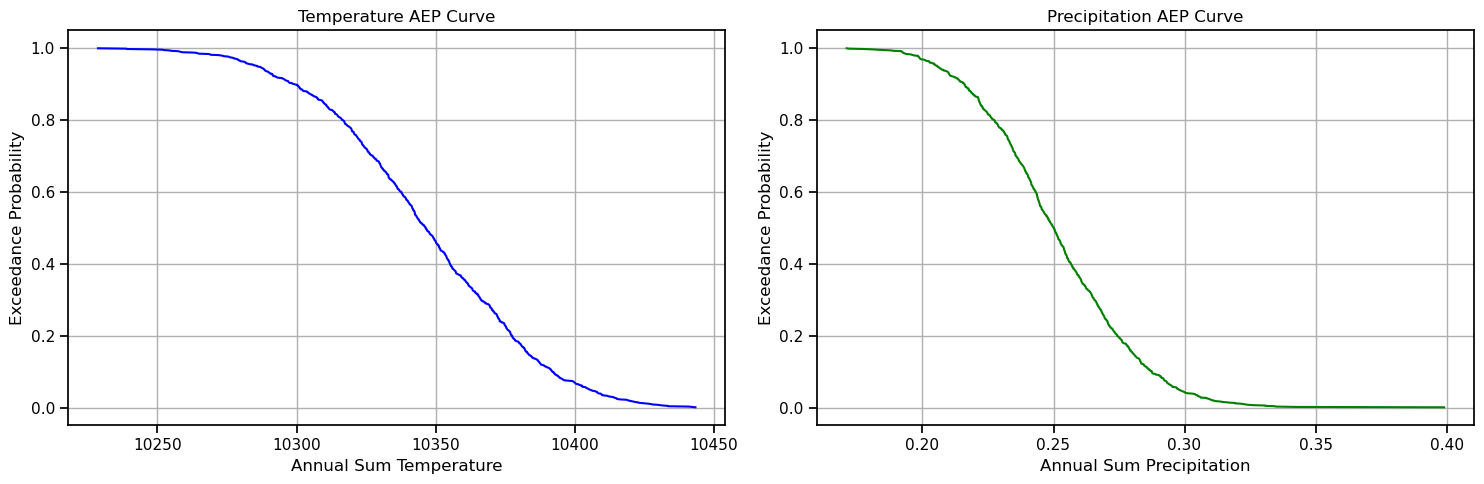

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Temperature AEP
ax1.plot( aep_temp['annual_sum'], aep_temp['exceedance_probability'], 'b-')
ax1.set_ylabel('Exceedance Probability')
ax1.set_xlabel('Annual Sum Temperature')
ax1.set_title('Temperature AEP Curve')
ax1.grid(True)

# Precipitation AEP
ax2.plot(aep_precip['annual_sum'], aep_precip['exceedance_probability'], 'g-')
ax2.set_ylabel('Exceedance Probability')
ax2.set_xlabel('Annual Sum Precipitation')
ax2.set_title('Precipitation AEP Curve')
ax2.grid(True)

plt.tight_layout()
plt.show()


## 2. Distribution of Daily Values from Simulations


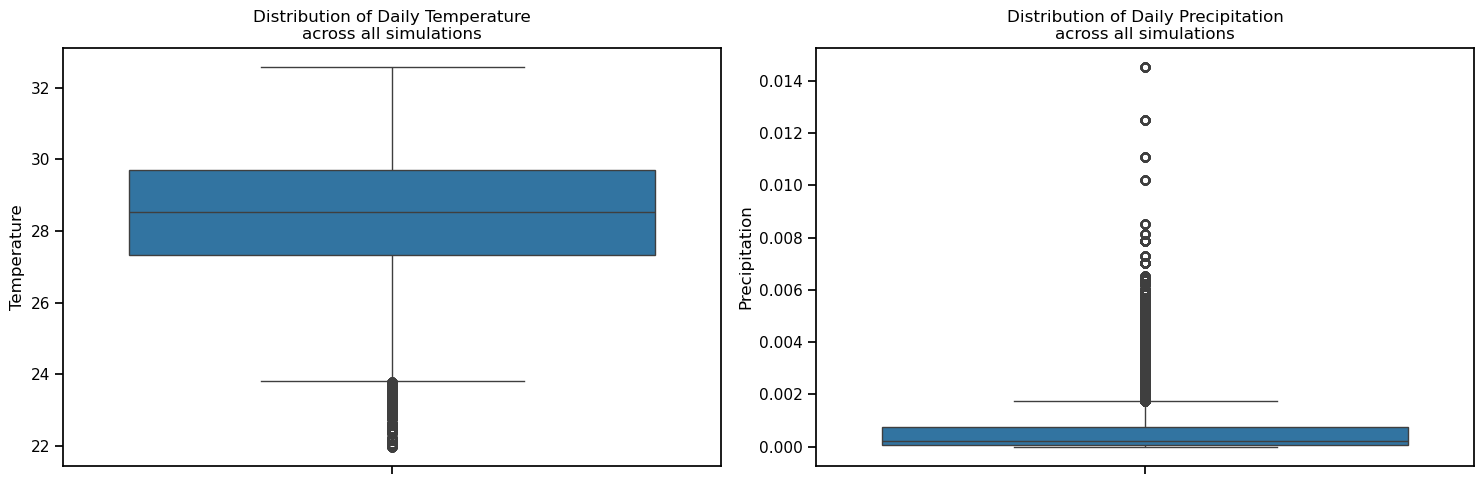

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Temperature distributions
sns.boxplot(data=daily_temp.melt(), y='value', ax=ax1)
ax1.set_title('Distribution of Daily Temperature\nacross all simulations')
ax1.set_ylabel('Temperature')

# Precipitation distributions
sns.boxplot(data=daily_precip.melt(), y='value', ax=ax2)
ax2.set_title('Distribution of Daily Precipitation\nacross all simulations')
ax2.set_ylabel('Precipitation')

plt.tight_layout()
plt.show()


## 3. Summary Statistics


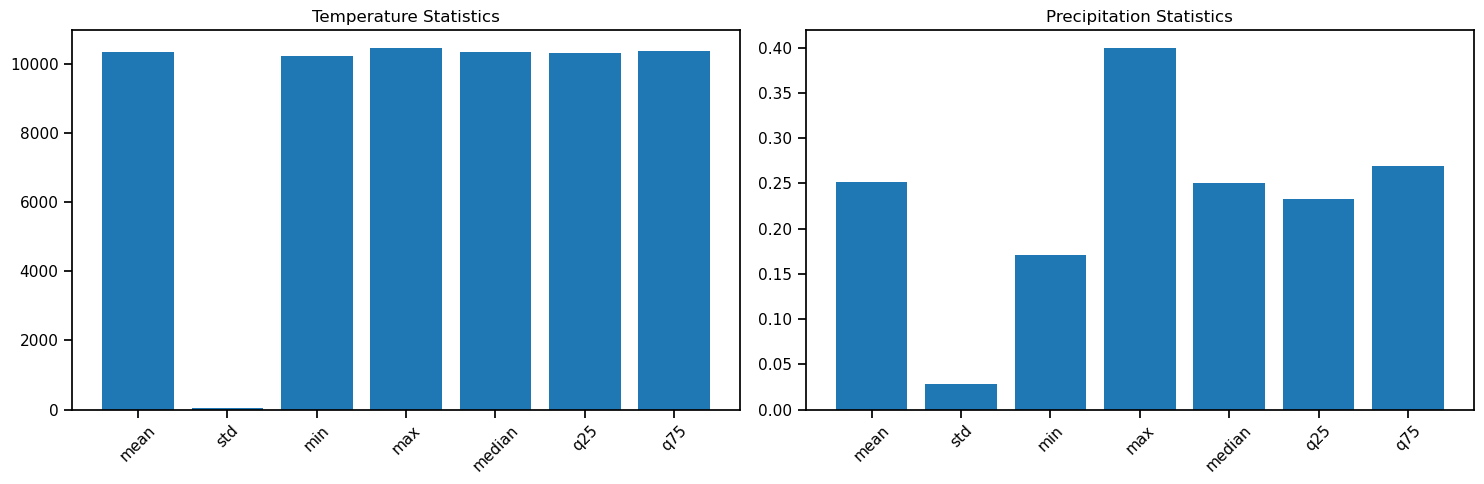

In [5]:
# Plot summary statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Temperature stats
temp_stats = summary_stats[summary_stats['variable'] == 'temperature']
ax1.bar(temp_stats['statistic'], temp_stats['value'])
ax1.set_title('Temperature Statistics')
ax1.tick_params(axis='x', rotation=45)

# Precipitation stats
precip_stats = summary_stats[summary_stats['variable'] == 'precipitation']
ax2.bar(precip_stats['statistic'], precip_stats['value'])
ax2.set_title('Precipitation Statistics')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 4. Joint Distribution Analysis


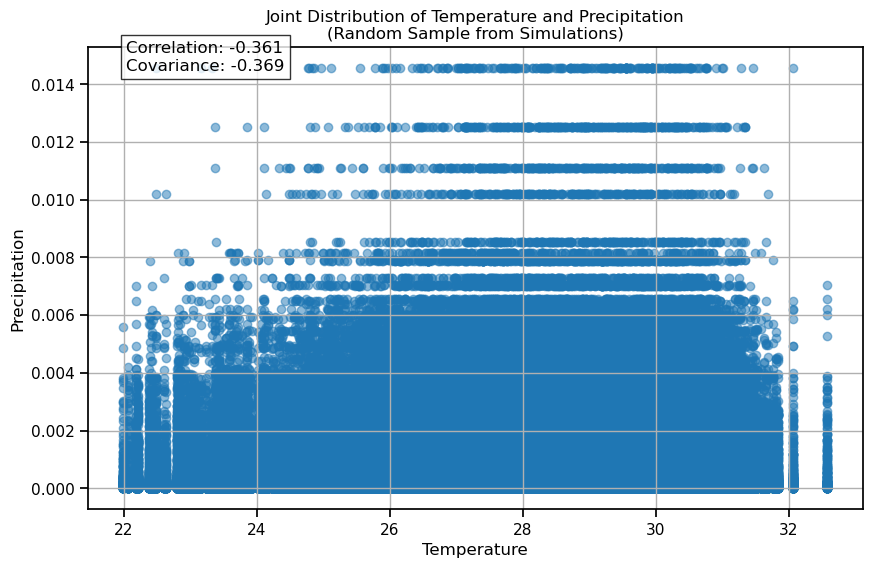

In [6]:
# Create scatter plot of random sample of daily values
sample_size = 1000
temp_sample = daily_temp.iloc[np.random.choice(daily_temp.shape[0], sample_size)].values.flatten()
precip_sample = daily_precip.iloc[np.random.choice(daily_precip.shape[0], sample_size)].values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(temp_sample, precip_sample, alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('Joint Distribution of Temperature and Precipitation\n(Random Sample from Simulations)')

# Add correlation information
corr_value = correlation[correlation['metric'] == 'correlation']['value'].values[0]
cov_value = correlation[correlation['metric'] == 'covariance']['value'].values[0]
plt.text(0.05, 0.95, f'Correlation: {corr_value:.3f}\nCovariance: {cov_value:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()


## 5. Temporal Patterns


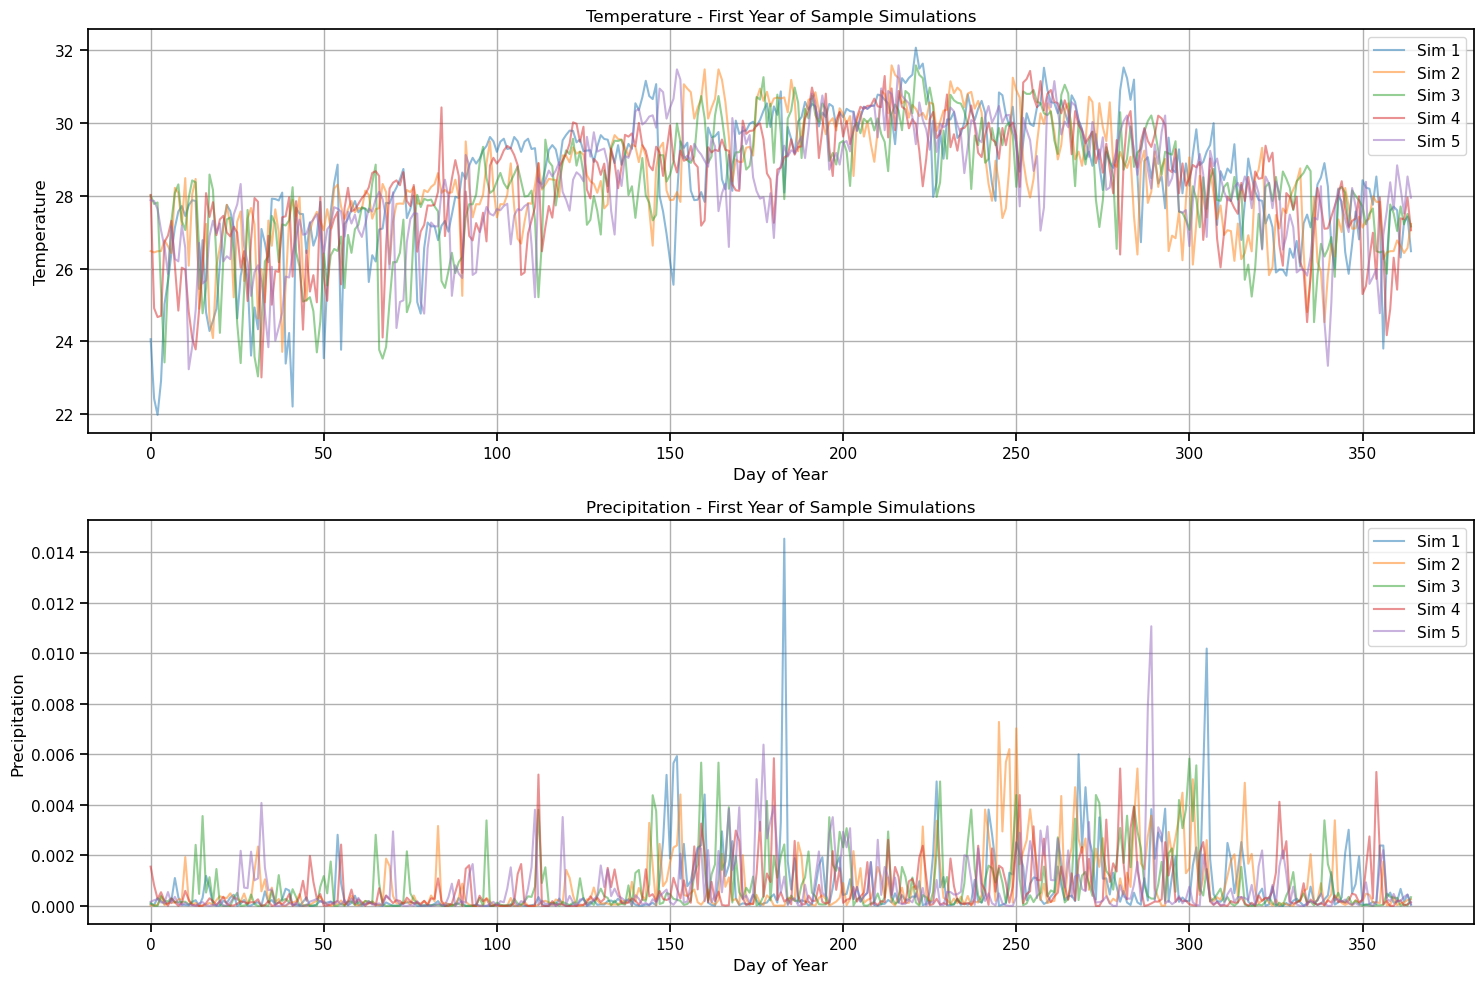

In [7]:
# Plot first 365 days of a few random simulations
n_sims = 5
days = 365

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Temperature
for i in range(n_sims):
    ax1.plot(daily_temp.iloc[:days, i], alpha=0.5, label=f'Sim {i+1}')
ax1.set_title('Temperature - First Year of Sample Simulations')
ax1.set_xlabel('Day of Year')
ax1.set_ylabel('Temperature')
ax1.legend()
ax1.grid(True)

# Precipitation
for i in range(n_sims):
    ax2.plot(daily_precip.iloc[:days, i], alpha=0.5, label=f'Sim {i+1}')
ax2.set_title('Precipitation - First Year of Sample Simulations')
ax2.set_xlabel('Day of Year')
ax2.set_ylabel('Precipitation')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
